<img src= "https://c.tenor.com/QJNoPeq9WmUAAAAC/netflix-intro-netflix.gif" width="600" >

# Netflix Movie/TV Show Content Analysis #



### After looking through many datasets, Netflix, which is one of the largest streaming platforms, seemed like something interesting to look into.

## I wanted to answer the following questions:
* How much content is added to Netflix each year? What does the trend look like?
* What are the most popular movie and tv show genres on Netflix?
* Where is most of the content produced?

## Below is the data dictionary for this dataset:

| Field | Description |
| :-- | :-- |
| **show_id** | Primary key for every movie/tv show
| **type** | Categorizes the content as either a TV show or a Movie
| **title** | Title of the Netflix content
| **director** | Name of person(s) who directed the movie
| **cast** | Actors/Actresses involved in the movie/tv show
| **country** | Country where the movie/show was produced
| **date_added** | Date it was added to Netflix
| **release_year** | Year the movie/show was originally released
| **rating** | Rating of the movie/show
| **listed_in** | Genre of the movie/show
| **description** | Brief description of the movie/show

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def read_file():
    return pd.read_csv('../input/netflix-shows/netflix_titles.csv')

netflix = read_file()
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


### Now time for the Data Cleanup:

So, like we had practiced in class, I wanted to make the show_id the primary index, but the problem was that this was a string and not a integer.

I thought that would make it more confusing to locate the show needed, so I made a definition that would strip the 's' off of the show_id and make it so that each show has its own unique number. 

In [2]:
def strip_message(string):
    return string.strip('s')

netflix['show_id'] = netflix['show_id'].apply(strip_message)
netflix.set_index('show_id', inplace=True)
netflix

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [3]:
nulls = pd.DataFrame(netflix.isnull().sum(), columns=['Count of Nulls'])
nulls.index.name = 'Column Name'
nulls[ nulls['Count of Nulls'] > 0 ].sort_values('Count of Nulls', ascending=False)

,Count of Nulls
Column Name,
director,2634
country,831
cast,825
date_added,10
rating,4
duration,3


#### Turns out that there are only three columns that have a LOT of nulls. This is not a huge deal as the contents of these columns are not really what I am going to be looking at anyway. 

#### As for the rating, duration, and date_added, I thought that there is such a small amount that is not listed, that I could drop the rows without affecting much. I think that there are enough movies/shows with this info that the absence of the rows will not effect any analysis in a negative way.

In [4]:
netflix.fillna({'director': 'Not Listed', 'country': 'Not Listed', 'cast': 'Not Listed'}, inplace=True)
netflix.dropna(subset=['rating', 'duration', 'date_added'], inplace=True)
netflix.drop(columns=['description'], inplace=True)
netflix.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
2,TV Show,Blood & Water,Not Listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Listed,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


#### The next part of the data cleanup was to make the 'date_added' column actual dates instead of strings:

In [5]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Listed,United States,2021-09-25,2020,PG-13,90 min,Documentaries
2,TV Show,Blood & Water,Not Listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Listed,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
4,TV Show,Jailbirds New Orleans,Not Listed,Not Listed,Not Listed,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
5,TV Show,Kota Factory,Not Listed,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...
8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8804,TV Show,Zombie Dumb,Not Listed,Not Listed,Not Listed,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies"


### Now that the data was cleaned up a bit, I could see how much content is added each year on Netflix and what the trend looks like:

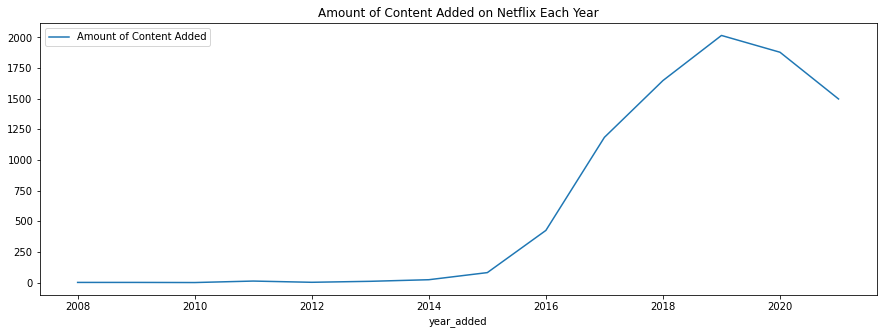

In [6]:
netflix['year_added'] = netflix['date_added'].dt.year
netflix[['year_added', 'title']].groupby('year_added') \
                                .count() \
                                .rename(columns={'title': 'Amount of Content Added'}) \
                                .plot(figsize=(15,5));

plt.title('Amount of Content Added on Netflix Each Year');

#### I thought it was interesting that the line goes down so much towards the end of the graph so I wanted to see the last time that content was added on this dataset:

In [7]:
netflix['date_added'].sort_values(ascending=False).head(5)

show_id
1    2021-09-25
7    2021-09-24
11   2021-09-24
10   2021-09-24
9    2021-09-24
Name: date_added, dtype: datetime64[ns]

### Turns out that the most recent content added was in September of 2021!! 

It makes sense that there was less content added in 2020 because it could be hypothesized that this was due to COVID-19. 

I think it is cool to see Netflix's progress in adding so much content for users to watch though, the content has been growing steadily since around 2016.

### Now time to move on to my next question: What are the most popular genres?


I really wanted to be able to group the movies into genres as well.

The only problem was that there were multiple genres listed for one show, so I decided to take the first genre as this would likely still be an accurate way to classify the movie.

In [8]:
def take_first_genre(genres):
    split_genres = genres.split(',')
    return split_genres[0]

netflix['listed_in'] = netflix['listed_in'].apply(take_first_genre)
netflix.rename(columns={'listed_in': 'genre'})

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,year_added
show_id,,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Listed,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
2,TV Show,Blood & Water,Not Listed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021
3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Listed,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,2021
4,TV Show,Jailbirds New Orleans,Not Listed,Not Listed,Not Listed,2021-09-24,2021,TV-MA,1 Season,Docuseries,2021
5,TV Show,Kota Factory,Not Listed,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021
...,...,...,...,...,...,...,...,...,...,...,...
8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,Cult Movies,2019
8804,TV Show,Zombie Dumb,Not Listed,Not Listed,Not Listed,2019-07-01,2018,TV-Y7,2 Seasons,Kids' TV,2019
8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,Comedies,2019


#### When we look at the dataset, there is different information in fields depending on whether the content is a show or movie. For example, under 'duration', if it is a TV show it is listed by the amount of seasons, whereas if it is a movie it is listed under the amount of minutes.

#### Because of this, I wanted to separate the two so that they can be analyzed separately:


In [9]:
tv_shows = netflix[netflix['type'] == 'TV Show']
movies = netflix[netflix['type'] == 'Movie']

## Looking at the top 10 TV Show genres

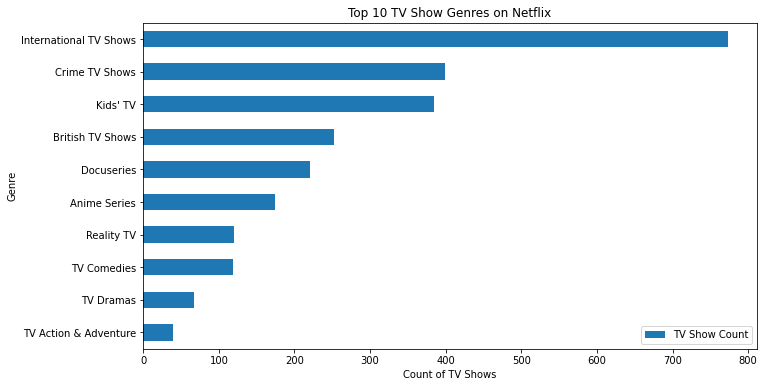

In [10]:
top_ten_tv_genres = tv_shows[['type', 'listed_in']] \
                    .groupby('listed_in') \
                    .count() \
                    .sort_values('type', ascending=False) \
                    .head(10) \
                    .sort_values('type') \
                    .rename(columns={'type': 'TV Show Count'})

top_ten_tv_genres.index.name = 'Genre'

top_ten_tv_genres.plot(kind='barh', figsize=(11,6));
plt.xlabel('Count of TV Shows')
plt.title('Top 10 TV Show Genres on Netflix');

So the the most common TV Show genre is International TV Shows! I found this quite interesting because I had never thought that that genre would be so common.

Now it is important to note that this may not be completely accurate due to the selection of the first genre that appeared on the dataset, but I think that there is such an overwhelming amount of International TV Shows over other genres that it still means there is a significant amount more.

## Looking at the top 10 Movie genres

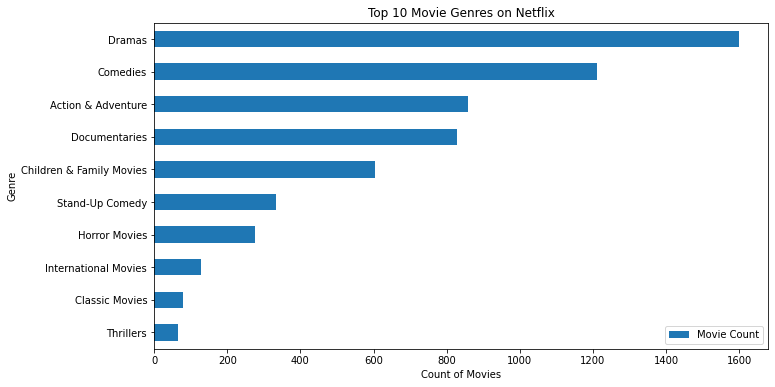

In [11]:
top_ten_movie_genres = movies[['type', 'listed_in']] \
                        .groupby('listed_in') \
                        .count() \
                        .sort_values('type', ascending=False) \
                        .head(10) \
                        .sort_values('type') \
                        .rename(columns={'type': 'Movie Count'})

top_ten_movie_genres.index.name = 'Genre'

top_ten_movie_genres.plot(kind='barh', figsize=(11,6));
plt.xlabel('Count of Movies')
plt.title('Top 10 Movie Genres on Netflix');

Now I find these top genres less surprising. There still may be a lack of accuracy, but I definitely am not surprised that a lot of Netflix movies fall under the genres of Drama, Comedy and Action & Adventure.

## Next I wanted to look at the distribution of the country where the content was produced:

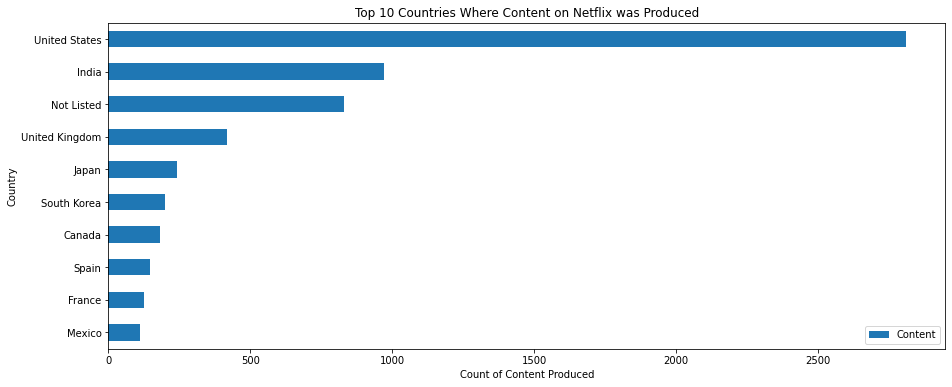

In [12]:
top_countries = netflix[['country', 'title']].groupby('country') \
                                             .count() \
                                             .sort_values('title', ascending=False) \
                                             .head(10) \
                                             .sort_values('title') \
                                             .rename(columns={'title': 'Content'})

top_countries.index.name = 'Country'
top_countries.plot(kind='barh', figsize=(15,6))
plt.xlabel('Count of Content Produced')
plt.title('Top 10 Countries Where Content on Netflix was Produced');

Since this data was taken from the content on the United States Netflix, it makes a lot of sense that the US is the top producer of content by a long shot compared to other countries. 



## Thank you for listening!! 

### I hope we all learned some more about Netflix content that we did not think of before!

<img src= "https://media4.giphy.com/media/wbcMnfHqOJX9K/giphy.webp?cid=ecf05e47gxc787q0fwzc1xoarsi979o5u5xune47n460jb57&rid=giphy.webp&ct=g" width="400">